<a href="https://colab.research.google.com/github/selimunal/Pytorch/blob/main/PyTorch_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
train_dataset = datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
torch.__version__

'1.12.1+cu113'

In [ ]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [ ]:
train_dataset.targets.shape

torch.Size([60000])

In [ ]:
train_dataset.targets.max()

tensor(9)

In [ ]:
test_dataset=datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

In [ ]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
test_dataset.targets.shape

torch.Size([10000])

In [ ]:
#BULD THE MODEL
model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)
#NO NEED FOR FINAL SOFTMAX

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
#Loss AND OPTIMIZER
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
#DATA LOADER
#useful beacause it automatically generates batches in the training loop
#and takes care of shuffling
batch_size=128
train_loader=torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader=torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
#check out what data loader does 
#maps the values to (0,1)
#makes the data of shape (batch size, color, height width)

tmp_loader=torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True
)

for x,y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break

In [ ]:
x.shape

torch.Size([1, 1, 28, 28])

In [ ]:
y.shape

torch.Size([1])

In [ ]:
torch.max(x)

tensor(1.)

In [ ]:
torch.min(x)

tensor(0.)

In [ ]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [ ]:
#TRAIN THE MODEL
n_epochs=35

#Stuff to store
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss=[]
  for inputs,targets in train_loader:
    #move data to GPU
    inputs,targets=inputs.to(device),targets.to(device)

    #reshape the input
    inputs=inputs.view(-1,784)

    #zero the parameter gradients
    optimizer.zero_grad()

    #forward pass
    outpus=model(inputs)
    loss=criterion(outpus,targets)

    #backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  #get train loss and test loss
  train_loss=np.mean(train_loss) #a little misleading

  test_loss=[]
  for inputs,targets in test_loader:
    inputs,targets=inputs.to(device), targets.to(device)
    inputs=inputs.view(-1,784)
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    test_loss.append(loss.item())
  
  test_loss=np.mean(test_loss)

  #save losses
  train_losses[it]=train_loss
  test_losses[it]=test_loss

  print(f'Epoch {it+1}/{n_epochs},Train Loss: {train_loss:.4f},Test Loss:{test_loss:.4f}')

Epoch 1/35,Train Loss: 0.4102,Test Loss:0.2139
Epoch 2/35,Train Loss: 0.1904,Test Loss:0.1562
Epoch 3/35,Train Loss: 0.1383,Test Loss:0.1267
Epoch 4/35,Train Loss: 0.1096,Test Loss:0.1059
Epoch 5/35,Train Loss: 0.0881,Test Loss:0.0927
Epoch 6/35,Train Loss: 0.0732,Test Loss:0.0869
Epoch 7/35,Train Loss: 0.0620,Test Loss:0.0845
Epoch 8/35,Train Loss: 0.0529,Test Loss:0.0804
Epoch 9/35,Train Loss: 0.0447,Test Loss:0.0754
Epoch 10/35,Train Loss: 0.0381,Test Loss:0.0827
Epoch 11/35,Train Loss: 0.0338,Test Loss:0.0800
Epoch 12/35,Train Loss: 0.0280,Test Loss:0.0730
Epoch 13/35,Train Loss: 0.0245,Test Loss:0.0751
Epoch 14/35,Train Loss: 0.0203,Test Loss:0.0748
Epoch 15/35,Train Loss: 0.0178,Test Loss:0.0701
Epoch 16/35,Train Loss: 0.0153,Test Loss:0.0773
Epoch 17/35,Train Loss: 0.0133,Test Loss:0.0764
Epoch 18/35,Train Loss: 0.0112,Test Loss:0.0785
Epoch 19/35,Train Loss: 0.0102,Test Loss:0.0774
Epoch 20/35,Train Loss: 0.0085,Test Loss:0.0773
Epoch 21/35,Train Loss: 0.0074,Test Loss:0.0822
E

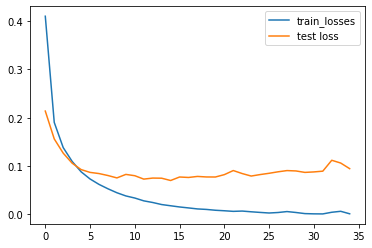

In [ ]:
#Plot the train loss and test Loss per iteration
plt.plot(train_losses,label='train_losses')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

In [ ]:
n_correct=0.
n_total=0.

for inputs, targets in train_loader:
  #move data to GPU
  inputs,targets=inputs.to(device),targets.to(device)

  #reshape the input
  inputs=inputs.view(-1,784)

  #forward pass
  outputs=model(inputs)

  #get prodictions 
  #torch.max returns both max and argmax
  _, predictions=torch.max(outputs,1)

  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]

train_acc=n_correct/n_total

n_correct=0.
n_total=0.

for inputs, targets in test_loader:

  #move data to GPU
  inputs,targets=inputs.to(device),targets.to(device)

  #reshape the input
  inputs=inputs.view(-1,784)

  #forward pass
  outputs=model(inputs)

  #get prediction
  #torch.max returns both max and argmax
  _,predictions=torch.max(outputs,1)

  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]

test_acc=n_correct/n_total

print(f'Train acc {train_acc:.4f}, test acc {test_acc:.4f}')


Train acc 0.9999, test acc 0.9788


In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Confusion matrix, without normalization
[[ 970    0    0    0    1    0    2    1    4    2]
 [   0 1123    3    0    0    1    2    2    4    0]
 [   4    2 1004    2    1    0    2    7    9    1]
 [   0    0    3  989    0    4    0    3    3    8]
 [   2    1    3    0  960    1    3    3    2    7]
 [   2    0    0    9    1  869    3    1    6    1]
 [   5    1    2    1    5    6  936    1    1    0]
 [   1    3    8    2    2    0    0 1003    2    7]
 [   3    1    3    3    1    4    1    4  948    6]
 [   1    2    0    4    7    3    0    2    4  986]]


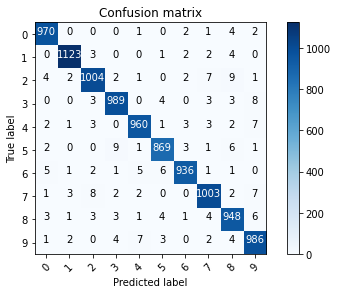

In [ ]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

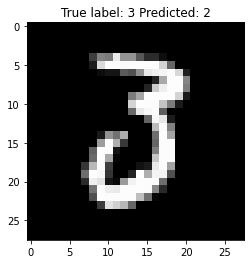

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])));